## Patient Experience measures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generic Data Cleaning and EDA

### Import Data and Check the properties

In [2]:
df=pd.read_csv("HCAHPS_Hospital.csv",encoding='latin1')

In [3]:
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,...,NaN,Not Applicable,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,...,NaN,66,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,...,NaN,12,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,...,NaN,22,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,...,NaN,Not Applicable,NaN,84,1194,NaN,27,NaN,01/01/2015,12/31/2015


In [4]:
df.shape

(264990, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 22 columns):
Provider ID                              264990 non-null int64
Hospital Name                            264990 non-null object
Address                                  264990 non-null object
City                                     264990 non-null object
State                                    264990 non-null object
ZIP Code                                 264990 non-null int64
County Name                              264165 non-null object
Phone Number                             264990 non-null int64
HCAHPS Measure ID                        264990 non-null object
HCAHPS Question                          264990 non-null object
HCAHPS Answer Description                264990 non-null object
Patient Survey Star Rating               264990 non-null object
Patient Survey Star Rating Footnote      15720 non-null object
HCAHPS Answer Percent                    264990 non-null obje

In [6]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID                               0.00
Hospital Name                             0.00
Address                                   0.00
City                                      0.00
State                                     0.00
ZIP Code                                  0.00
County Name                               0.31
Phone Number                              0.00
HCAHPS Measure ID                         0.00
HCAHPS Question                           0.00
HCAHPS Answer Description                 0.00
Patient Survey Star Rating                0.00
Patient Survey Star Rating Footnote      94.07
HCAHPS Answer Percent                     0.00
HCAHPS Answer Percent Footnote           83.38
HCAHPS Linear Mean Value                  0.00
Number of Completed Surveys               0.00
Number of Completed Surveys Footnote     88.02
Survey Response Rate Percent              0.00
Survey Response Rate Percent Footnote    71.42
Measure Start Date                        0.00
Measure End D

#### Dropping columns having more than 50% null values and eliminating rows having null values

In [7]:
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(264990, 18)

In [8]:
df=df.dropna(axis=0, how='any')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264165 entries, 0 to 264989
Data columns (total 18 columns):
Provider ID                     264165 non-null int64
Hospital Name                   264165 non-null object
Address                         264165 non-null object
City                            264165 non-null object
State                           264165 non-null object
ZIP Code                        264165 non-null int64
County Name                     264165 non-null object
Phone Number                    264165 non-null int64
HCAHPS Measure ID               264165 non-null object
HCAHPS Question                 264165 non-null object
HCAHPS Answer Description       264165 non-null object
Patient Survey Star Rating      264165 non-null object
HCAHPS Answer Percent           264165 non-null object
HCAHPS Linear Mean Value        264165 non-null object
Number of Completed Surveys     264165 non-null object
Survey Response Rate Percent    264165 non-null object
Measure Star

In [10]:
# Drop duplicate records if any
df=df.drop_duplicates(keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264165 entries, 0 to 264989
Data columns (total 18 columns):
Provider ID                     264165 non-null int64
Hospital Name                   264165 non-null object
Address                         264165 non-null object
City                            264165 non-null object
State                           264165 non-null object
ZIP Code                        264165 non-null int64
County Name                     264165 non-null object
Phone Number                    264165 non-null int64
HCAHPS Measure ID               264165 non-null object
HCAHPS Question                 264165 non-null object
HCAHPS Answer Description       264165 non-null object
Patient Survey Star Rating      264165 non-null object
HCAHPS Answer Percent           264165 non-null object
HCAHPS Linear Mean Value        264165 non-null object
Number of Completed Surveys     264165 non-null object
Survey Response Rate Percent    264165 non-null object
Measure Star

### Removing unwanted data -

### This step will be specific to your dataset 
data where most of the metrics are not available/not applicable wont give any info so removing such records.
Address , city, state can be removed as we have Zip Code 

In [11]:
df=df[~((df["Patient Survey Star Rating"].isin(['Not Applicable','Not Available'])))] 

In [12]:
df=df.drop(["Address","City","State","Phone Number","ZIP Code","County Name","Hospital Name","HCAHPS Question","HCAHPS Answer Description","HCAHPS Answer Percent","HCAHPS Linear Mean Value","Number of Completed Surveys","Survey Response Rate Percent","Measure Start Date","Measure End Date"],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42048 entries, 0 to 264659
Data columns (total 3 columns):
Provider ID                   42048 non-null int64
HCAHPS Measure ID             42048 non-null object
Patient Survey Star Rating    42048 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


### Converting some categorical variables to numeric

In [16]:
df = df.replace(['Not Available','Not Applicable'],0)

In [18]:
df["Patient Survey Star Rating"]=df[["Patient Survey Star Rating"]].apply(pd.to_numeric,errors='coerce')

In [19]:
df=df.fillna(0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42048 entries, 0 to 264659
Data columns (total 3 columns):
Provider ID                   42048 non-null int64
HCAHPS Measure ID             42048 non-null object
Patient Survey Star Rating    42048 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


## Writing cleaned data to another file

In [22]:
df.to_csv('HCAHPS.csv')

In [23]:
HCAHPS = df[:]
HCAHPS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42048 entries, 0 to 264659
Data columns (total 3 columns):
Provider ID                   42048 non-null int64
HCAHPS Measure ID             42048 non-null object
Patient Survey Star Rating    42048 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [24]:
df['HCAHPS Measure ID'].unique()

array(['H_STAR_RATING', 'H_CLEAN_STAR_RATING', 'H_COMP_1_STAR_RATING',
       'H_COMP_2_STAR_RATING', 'H_COMP_3_STAR_RATING',
       'H_COMP_4_STAR_RATING', 'H_COMP_5_STAR_RATING',
       'H_COMP_6_STAR_RATING', 'H_COMP_7_STAR_RATING',
       'H_HSP_RATING_STAR_RATING', 'H_QUIET_STAR_RATING',
       'H_RECMND_STAR_RATING'], dtype=object)

In [25]:
df=df.rename(columns={"HCAHPS Measure ID": "Measure ID", "Patient Survey Star Rating": "Score"})

In [26]:
#Pivot table
df=df.pivot_table(values= 'Score', index= 'Provider ID', columns= 'Measure ID')
df.reset_index(inplace=True)
df = df.rename_axis(None)
df.head()

Measure ID,Provider ID,H_CLEAN_STAR_RATING,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_HSP_RATING_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING,H_STAR_RATING
0,10001,2,3,3,2,3,3,3,3,4,4,4,3
1,10005,2,3,4,3,3,3,4,2,4,4,3,3
2,10006,2,3,4,3,3,3,2,2,2,4,2,3
3,10007,3,3,5,4,4,4,3,3,3,5,3,4
4,10011,1,3,3,2,3,2,3,2,3,3,3,3


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 13 columns):
Provider ID                 3504 non-null int64
H_CLEAN_STAR_RATING         3504 non-null int64
H_COMP_1_STAR_RATING        3504 non-null int64
H_COMP_2_STAR_RATING        3504 non-null int64
H_COMP_3_STAR_RATING        3504 non-null int64
H_COMP_4_STAR_RATING        3504 non-null int64
H_COMP_5_STAR_RATING        3504 non-null int64
H_COMP_6_STAR_RATING        3504 non-null int64
H_COMP_7_STAR_RATING        3504 non-null int64
H_HSP_RATING_STAR_RATING    3504 non-null int64
H_QUIET_STAR_RATING         3504 non-null int64
H_RECMND_STAR_RATING        3504 non-null int64
H_STAR_RATING               3504 non-null int64
dtypes: int64(13)
memory usage: 356.0 KB


In [28]:
print(df.columns)
print(df.shape)

Index(['Provider ID', 'H_CLEAN_STAR_RATING', 'H_COMP_1_STAR_RATING',
       'H_COMP_2_STAR_RATING', 'H_COMP_3_STAR_RATING', 'H_COMP_4_STAR_RATING',
       'H_COMP_5_STAR_RATING', 'H_COMP_6_STAR_RATING', 'H_COMP_7_STAR_RATING',
       'H_HSP_RATING_STAR_RATING', 'H_QUIET_STAR_RATING',
       'H_RECMND_STAR_RATING', 'H_STAR_RATING'],
      dtype='object', name='Measure ID')
(3504, 13)


In [29]:
round((df.isnull().sum()/df.isnull().count())*100,2)

Measure ID
Provider ID                 0.0
H_CLEAN_STAR_RATING         0.0
H_COMP_1_STAR_RATING        0.0
H_COMP_2_STAR_RATING        0.0
H_COMP_3_STAR_RATING        0.0
H_COMP_4_STAR_RATING        0.0
H_COMP_5_STAR_RATING        0.0
H_COMP_6_STAR_RATING        0.0
H_COMP_7_STAR_RATING        0.0
H_HSP_RATING_STAR_RATING    0.0
H_QUIET_STAR_RATING         0.0
H_RECMND_STAR_RATING        0.0
H_STAR_RATING               0.0
dtype: float64

In [30]:
df.fillna(0, inplace=True)

In [31]:
## write data to csv file in case we need data without coef application for clustering
df.to_csv('Patient_exp_cluster.csv')

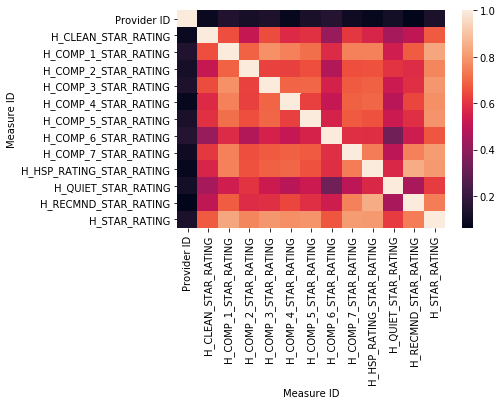

In [32]:
sns.heatmap(df.corr())

In [33]:
# multiplying measure scores with respective weigts(loading coefficients)
df['H_CLEAN_STAR_RATING'] = df['H_CLEAN_STAR_RATING']*0.65
df['H_COMP_1_STAR_RATING'] = df['H_COMP_1_STAR_RATING']*0.74
df['H_COMP_2_STAR_RATING'] = df['H_COMP_2_STAR_RATING']*0.61
df['H_COMP_3_STAR_RATING'] = df['H_COMP_3_STAR_RATING']*0.70
df['H_COMP_4_STAR_RATING'] = df['H_COMP_4_STAR_RATING']*0.67
df['H_COMP_5_STAR_RATING'] = df['H_COMP_5_STAR_RATING']*0.69
df['H_COMP_6_STAR_RATING'] = df['H_COMP_6_STAR_RATING']*0.58
df['H_COMP_7_STAR_RATING'] = df['H_COMP_7_STAR_RATING']*0.77
df['H_RECMND_STAR_RATING'] = df['H_RECMND_STAR_RATING']*0.74
df['H_QUIET_STAR_RATING'] = df['H_QUIET_STAR_RATING']*0.58
df['H_HSP_RATING_STAR_RATING'] = df['H_HSP_RATING_STAR_RATING']*0.78



In [34]:
df=df.drop('H_STAR_RATING',axis=1)

In [35]:
# Average of the weighted scores to calculated group score.
df['Patent_exp_score'] = ((df['H_CLEAN_STAR_RATING']+df['H_COMP_1_STAR_RATING']+df['H_COMP_2_STAR_RATING']+df['H_COMP_3_STAR_RATING']+df['H_COMP_4_STAR_RATING']+df['H_COMP_5_STAR_RATING']+df['H_COMP_6_STAR_RATING']+df['H_COMP_7_STAR_RATING']+df['H_RECMND_STAR_RATING']+df['H_QUIET_STAR_RATING']+df['H_HSP_RATING_STAR_RATING'])/11)

In [36]:
df.head()

Measure ID,Provider ID,H_CLEAN_STAR_RATING,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_HSP_RATING_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING,Patent_exp_score
0,10001,1.30,2.22,1.83,1.4,2.01,2.07,1.74,2.31,3.12,2.32,2.96,2.116364
1,10005,1.30,2.22,2.44,2.1,2.01,2.07,2.32,1.54,3.12,2.32,2.22,2.150909
2,10006,1.30,2.22,2.44,2.1,2.01,2.07,1.16,1.54,1.56,2.32,1.48,1.836364
3,10007,1.95,2.22,3.05,2.8,2.68,2.76,1.74,2.31,2.34,2.90,2.22,2.451818
4,10011,0.65,2.22,1.83,1.4,2.01,1.38,1.74,1.54,2.34,1.74,2.22,1.733636


In [37]:
# Write data to file for further merging and using for modelling
df.to_csv('Patient_exp_score.csv')

In [39]:
df_copy=df.drop('Patent_exp_score',axis=1)
df_copy.corr()

Measure ID,Provider ID,H_CLEAN_STAR_RATING,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_HSP_RATING_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING
Measure ID,,,,,,,,,,,,
Provider ID,1.000000,0.086543,0.144586,0.120103,0.134408,0.077222,0.128028,0.151517,0.101638,0.080823,0.111721,0.062560
H_CLEAN_STAR_RATING,0.086543,1.000000,0.652459,0.517159,0.650388,0.575496,0.593756,0.418628,0.610915,0.567434,0.448710,0.505396
H_COMP_1_STAR_RATING,0.144586,0.652459,1.000000,0.689799,0.786818,0.753834,0.716499,0.581488,0.751345,0.751152,0.539204,0.681239
H_COMP_2_STAR_RATING,0.120103,0.517159,0.689799,1.000000,0.633547,0.626302,0.655503,0.473717,0.652541,0.659734,0.598751,0.584533
H_COMP_3_STAR_RATING,0.134408,0.650388,0.786818,0.633547,1.000000,0.692981,0.698292,0.555443,0.676588,0.688491,0.529944,0.591197
H_COMP_4_STAR_RATING,0.077222,0.575496,0.753834,0.626302,0.692981,1.000000,0.625084,0.515757,0.685365,0.699327,0.490547,0.638198
H_COMP_5_STAR_RATING,0.128028,0.593756,0.716499,0.655503,0.698292,0.625084,1.000000,0.558091,0.675113,0.662948,0.529751,0.592342
H_COMP_6_STAR_RATING,0.151517,0.418628,0.581488,0.473717,0.555443,0.515757,0.558091,1.000000,0.592211,0.587650,0.333222,0.538250
H_COMP_7_STAR_RATING,0.101638,0.610915,0.751345,0.652541,0.676588,0.685365,0.675113,0.592211,1.000000,0.746668,0.497206,0.754160


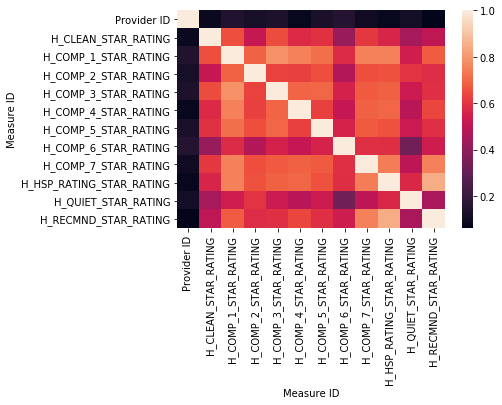

In [40]:
sns.heatmap(df_copy.corr())

In [41]:
df1= df_copy.drop('Provider ID',axis=1)

In [42]:
meandf= pd.DataFrame(df1.mean())

In [43]:
meandf['index1'] = meandf.index

In [44]:
meandf = meandf.rename_axis(None)
meandf.rename(columns={'index1':'Measures',0:'mean'},inplace=True)
meandf

,mean,Measures
H_CLEAN_STAR_RATING,1.862257,H_CLEAN_STAR_RATING
H_COMP_1_STAR_RATING,2.621045,H_COMP_1_STAR_RATING
H_COMP_2_STAR_RATING,1.973447,H_COMP_2_STAR_RATING
H_COMP_3_STAR_RATING,2.323944,H_COMP_3_STAR_RATING
H_COMP_4_STAR_RATING,2.119755,H_COMP_4_STAR_RATING
H_COMP_5_STAR_RATING,2.133801,H_COMP_5_STAR_RATING
H_COMP_6_STAR_RATING,1.949886,H_COMP_6_STAR_RATING
H_COMP_7_STAR_RATING,2.044104,H_COMP_7_STAR_RATING
H_HSP_RATING_STAR_RATING,2.727774,H_HSP_RATING_STAR_RATING
H_QUIET_STAR_RATING,1.751090,H_QUIET_STAR_RATING


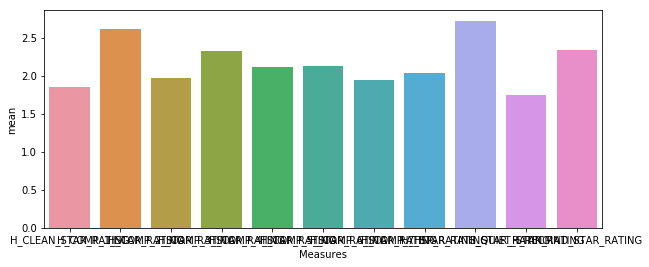

In [45]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(y='mean', x='Measures', data= meandf)